## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

In [75]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns = housing.feature_names)
y = pd.DataFrame(housing.target, columns = ['MedHouseVal'])
df = pd.concat([X,y], axis=1)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
tree_model = DecisionTreeRegressor(max_depth=3)

In [64]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [65]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)

In [66]:
ccp_alphas = path.ccp_alphas

In [67]:
len(ccp_alphas)

8

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [68]:
trees = []

for ccp_alpha in ccp_alphas:
    print(f'Training Tree alpha {ccp_alpha}')
    tree_pruning = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    tree_pruning.fit(X_train, y_train)
    trees.append(tree_pruning)

Training Tree alpha 0.0
Training Tree alpha 0.008008565557080197
Training Tree alpha 0.02031893624676656
Training Tree alpha 0.025387869656735285
Training Tree alpha 0.05971185153299813
Training Tree alpha 0.07951404855964683
Training Tree alpha 0.10173305330948845
Training Tree alpha 0.42080279385913055


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [72]:
for n, model in enumerate(trees):
    print(f"Tree alpha {ccp_alphas[n]:.5f}")

    mse_train = mse(y_train, model.predict(X_train))
    mse_test = mse(y_test, model.predict(X_test))

    print(f"MSE: Treino ({mse_train}) Teste ({mse_test})")
    print('---')

Tree alpha 0.00000
MSE: Treino (9.081073211265136e-32) Teste (0.5171707212330232)
---
Tree alpha 0.00801
MSE: Treino (0.5433723681127705) Teste (0.5722417559918498)
---
Tree alpha 0.02032
MSE: Treino (0.6471652543904336) Teste (0.6647456804865826)
---
Tree alpha 0.02539
MSE: Treino (0.6725531240471755) Teste (0.6904453700596703)
---
Tree alpha 0.05971
MSE: Treino (0.6725531240471755) Teste (0.6904453700596703)
---
Tree alpha 0.07951
MSE: Treino (0.8117790241396691) Teste (0.8204456361662383)
---
Tree alpha 0.10173
MSE: Treino (0.9135120774491342) Teste (0.9358890477080712)
---
Tree alpha 0.42080
MSE: Treino (0.9135120774491342) Teste (0.9358890477080712)
---


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

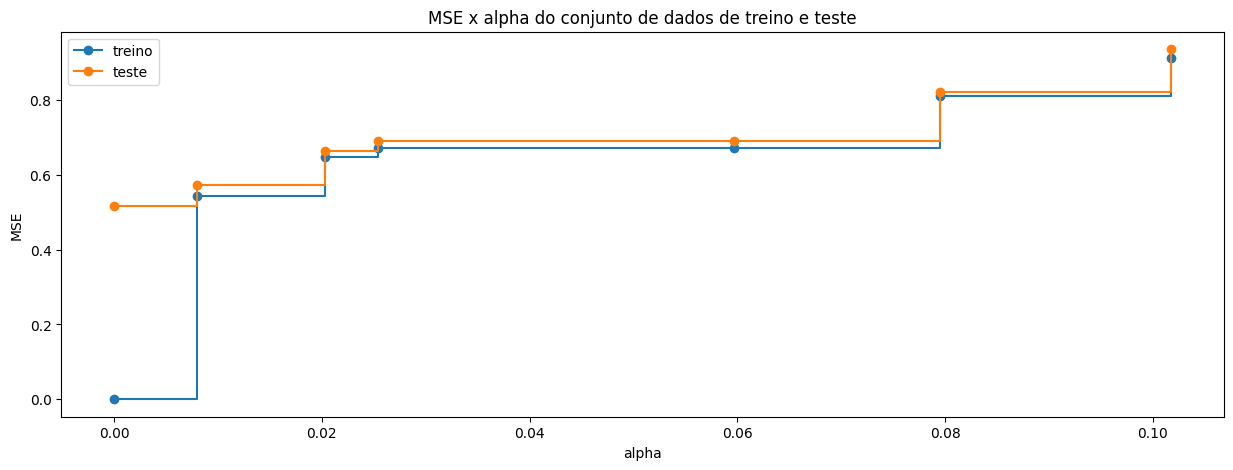

In [70]:
train_mse = [mse(y_train , model.predict(X_train)) for model in trees]
test_mse  = [mse(y_test  , model.predict(X_test )) for model in trees]

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_mse[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_mse[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [73]:
final_tree = DecisionTreeRegressor(ccp_alpha=0.008)
final_tree.fit(X_train, y_train)

r2_train = final_tree.score(X_train, y_train)
r2_test = final_tree.score(X_test, y_test)

print(f"R2: Treino ({r2_train}) Teste ({r2_test})")

R2: Treino (0.5927705073241125) Teste (0.5675378428793313)


### 7. Visualize esta árvore.

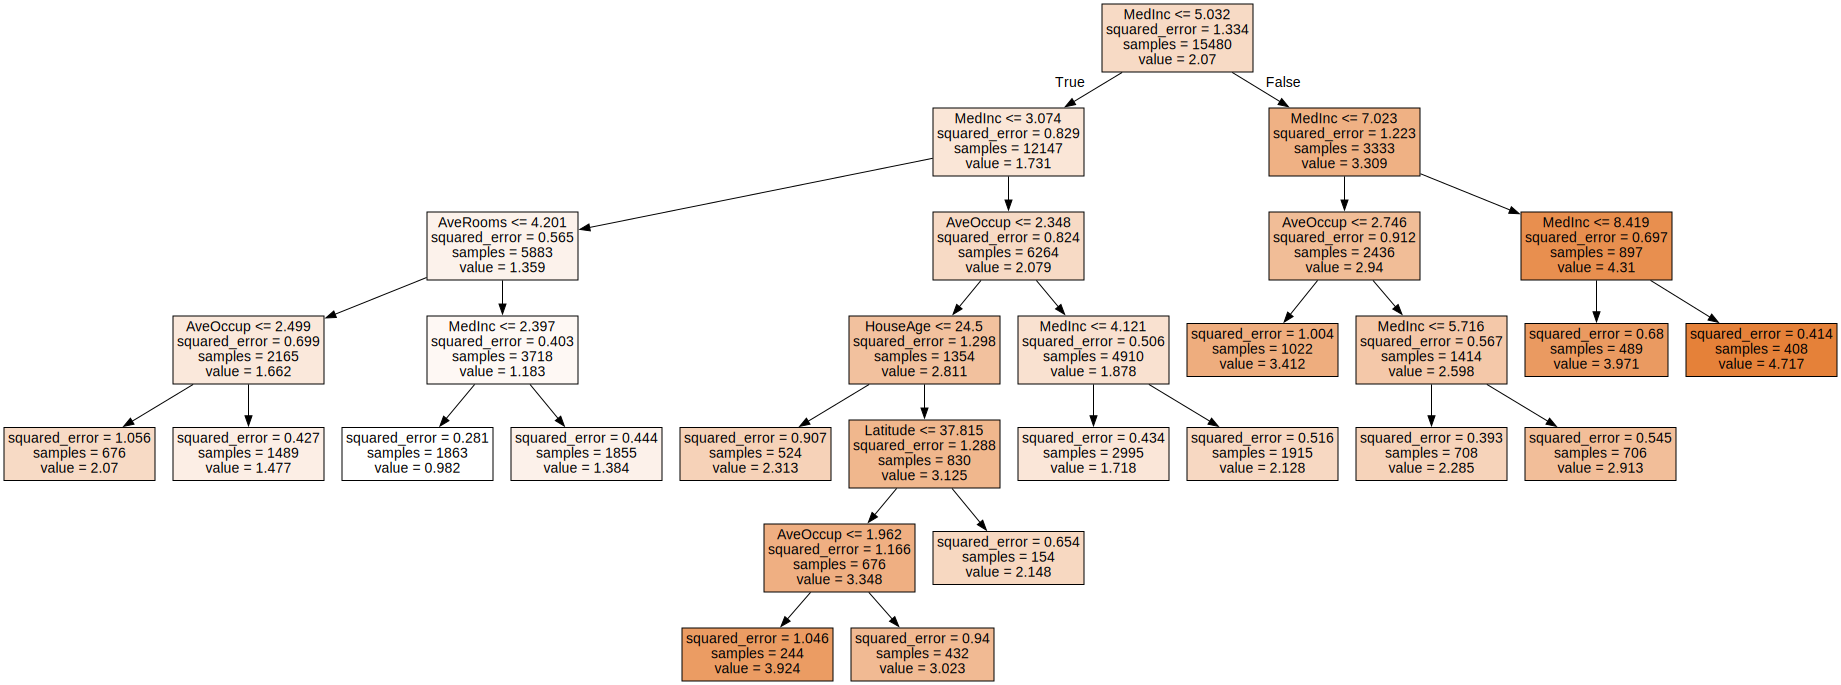

In [76]:
dot_data = tree.export_graphviz(final_tree, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph